# 🔎 DEFINICIÓN DEL PROBLEMA

🎯 Objetivo general: Analizar el impacto de la pandemia en la cobertura educativa y la deserción escolar a nivel nacional, identificando factores clave que influyeron en la permanencia de los estudiantes colombianos en el sistema educativo.

🔹 Objetivos Específicos: 

✅ 1. Comparar la evolución de la cobertura neta y bruta antes, durante y después de la pandemia en los distintos niveles (transición, primaria, secundaria y media) para detectar cambios en el acceso y matriculación de estudiantes.

✅ 2. Evaluar la relación entre la deserción escolar y factores como repitencia y aprobación en el periodo 2020-2022 y su variación respecto a los años anteriores.

✅ 3. Visualizar los datos analizados con respecto a las variaciones en cobertura y deserción escolar teniendo en cuenta los departamentos a nivel nacional.

✅ 4. Realizar pronósticos de la repitencia y desersión para 2026 utilizando modelos de machine learning (aprendizaje automático), con base en las tendencias observadas entre 2014 y 2023.

# Pregunta problema: ¿Cómo impactó la pandemia los niveles de cobertura, de deserción y repitencia en el sistema educativo colombiano?

# 🔍 1.--- EDA (Exploración y Analisis de Datos)---

📂1.1--- Importar las librerías necesarias ---

In [772]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

📥1.2 --- Carga de datos ---

In [773]:
data= pd.read_csv("Estadísticas en Educación.csv")
data.head()

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2023,5001,Medellín,5,Antioquia,3759.0,Medellín,377562,96.15,95.94,...,9.23,0.15,6.21,15.40,7.27,9.25,1.82,8.34,13.69,4.48
1,2023,5002,Abejorral,5,Antioquia,3758.0,Antioquia (ETC),3634,74.38,74.38,...,7.77,0.56,7.26,10.93,4.41,9.07,1.67,10.28,11.32,2.20
2,2023,5004,Abriaquí,5,Antioquia,3758.0,Antioquia (ETC),503,62.62,62.62,...,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
3,2023,5021,Alejandría,5,Antioquia,3758.0,Antioquia (ETC),864,81.37,81.37,...,7.88,0.00,7.02,13.65,2.40,7.20,1.59,7.69,11.65,0.00
4,2023,5030,Amagá,5,Antioquia,3758.0,Antioquia (ETC),5060,78.30,78.30,...,10.71,0.00,9.63,16.48,5.50,12.08,0.29,11.54,18.48,3.98


In [774]:
# Informacion general del Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          14585 non-null  int64  
 1   CÓDIGO_MUNICIPIO             14585 non-null  int64  
 2   MUNICIPIO                    14585 non-null  object 
 3   CÓDIGO_DEPARTAMENTO          14585 non-null  int64  
 4   DEPARTAMENTO                 14585 non-null  object 
 5   CÓDIGO_ETC                   14585 non-null  float64
 6   ETC                          14585 non-null  object 
 7   POBLACIÓN_5_16               14579 non-null  object 
 8   TASA_MATRICULACIÓN_5_16      14470 non-null  float64
 9   COBERTURA_NETA               14474 non-null  float64
 10  COBERTURA_NETA_TRANSICIÓN    14533 non-null  float64
 11  COBERTURA_NETA_PRIMARIA      14494 non-null  float64
 12  COBERTURA_NETA_SECUNDARIA    14491 non-null  float64
 13  COBERTURA_NETA_M

🔬1.3 --- Exploración de datos ---

In [775]:
# Verificación de valores nulos en las columnas
print("Columnas con datos faltantes:")
null_cols= data.columns[data.isnull().any()]
for col in null_cols:
    print(f"Columna: {col} → Nulos: {data[col].isnull().sum()} → Tipo: {data[col].dtype}")

Columnas con datos faltantes:
Columna: POBLACIÓN_5_16 → Nulos: 6 → Tipo: object
Columna: TASA_MATRICULACIÓN_5_16 → Nulos: 115 → Tipo: float64
Columna: COBERTURA_NETA → Nulos: 111 → Tipo: float64
Columna: COBERTURA_NETA_TRANSICIÓN → Nulos: 52 → Tipo: float64
Columna: COBERTURA_NETA_PRIMARIA → Nulos: 91 → Tipo: float64
Columna: COBERTURA_NETA_SECUNDARIA → Nulos: 94 → Tipo: float64
Columna: COBERTURA_NETA_MEDIA → Nulos: 93 → Tipo: float64
Columna: COBERTURA_BRUTA → Nulos: 68 → Tipo: float64
Columna: COBERTURA_BRUTA_TRANSICIÓN → Nulos: 97 → Tipo: float64
Columna: COBERTURA_BRUTA_PRIMARIA → Nulos: 81 → Tipo: float64
Columna: COBERTURA_BRUTA_SECUNDARIA → Nulos: 88 → Tipo: float64
Columna: COBERTURA_BRUTA_MEDIA → Nulos: 127 → Tipo: float64
Columna: TAMAÑO_PROMEDIO_DE_GRUPO → Nulos: 7013 → Tipo: float64
Columna: SEDES_CONECTADAS_A_INTERNET → Nulos: 6817 → Tipo: float64
Columna: DESERCIÓN → Nulos: 142 → Tipo: float64
Columna: DESERCIÓN_TRANSICIÓN → Nulos: 903 → Tipo: float64
Columna: DESERCIÓN_

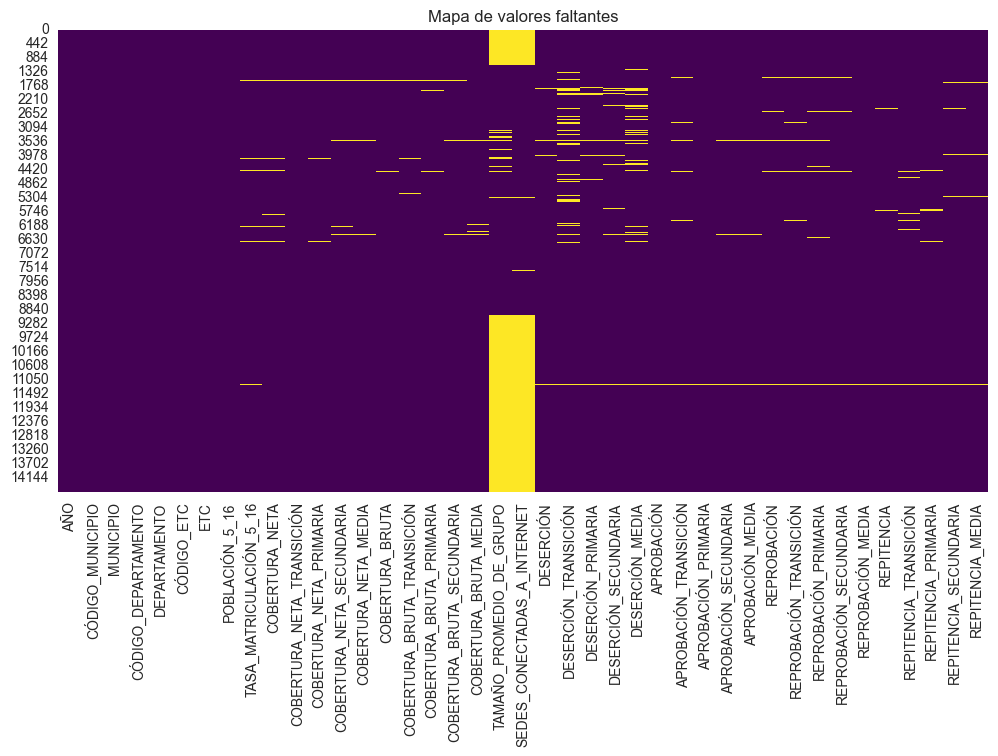

In [776]:
# Crear una figura
plt.figure(figsize=(12,6))
# Generar el heatmap de valores faltantes
sns.heatmap(data.isnull(), cmap="viridis", cbar=False)
# Agregar título
plt.title("Mapa de valores faltantes")
plt.show()

In [777]:
#Verificación de filas y columnas duplicadas

# Filas duplicadas
duplicate_rows = data[data.duplicated()]

# Columnas duplicadas
duplicate_columns = data.T.duplicated(keep=False)
duplicated_column_names = data.columns[duplicate_columns]

# Mostrar resultados
print(f" Total de filas duplicadas: {duplicate_rows.shape[0]}")
if not duplicate_rows.empty:
    print("\n Filas duplicadas en el dataset:")
    print(duplicate_rows)
else:
    print("\n No hay filas duplicadas.")

print("\n Columnas duplicadas en el dataset:")
if len(duplicated_column_names) > 0:
    print(duplicated_column_names.tolist())
else:
    print("\n No hay columnas duplicadas.")

 Total de filas duplicadas: 0

 No hay filas duplicadas.

 Columnas duplicadas en el dataset:
['APROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_TRANSICIÓN']


In [778]:
# Descripción de las columnas duplicadas detectadas
duplicated_columns = ['APROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_TRANSICIÓN']
# Mostrar el contenido de las columnas duplicadas
print("📌 Valores en las columnas duplicadas:")
print(data[duplicated_columns])

📌 Valores en las columnas duplicadas:
       APROBACIÓN_TRANSICIÓN  REPROBACIÓN_TRANSICIÓN
0                       0.15                    0.15
1                       0.56                    0.56
2                       0.00                    0.00
3                       0.00                    0.00
4                       0.00                    0.00
...                      ...                     ...
14580                   0.00                    0.00
14581                   0.23                    0.23
14582                   0.00                    0.00
14583                   0.00                    0.00
14584                   0.10                    0.10

[14585 rows x 2 columns]


In [779]:
#Verificar los valores "0" (cero) de cada columna numérica
(data == 0).sum()

AÑO                                0
CÓDIGO_MUNICIPIO                   3
MUNICIPIO                          0
CÓDIGO_DEPARTAMENTO                3
DEPARTAMENTO                       0
CÓDIGO_ETC                         3
ETC                                0
POBLACIÓN_5_16                     0
TASA_MATRICULACIÓN_5_16            5
COBERTURA_NETA                     8
COBERTURA_NETA_TRANSICIÓN          9
COBERTURA_NETA_PRIMARIA            8
COBERTURA_NETA_SECUNDARIA         26
COBERTURA_NETA_MEDIA              50
COBERTURA_BRUTA                    8
COBERTURA_BRUTA_TRANSICIÓN         8
COBERTURA_BRUTA_PRIMARIA           8
COBERTURA_BRUTA_SECUNDARIA        26
COBERTURA_BRUTA_MEDIA             43
TAMAÑO_PROMEDIO_DE_GRUPO           0
SEDES_CONECTADAS_A_INTERNET      284
DESERCIÓN                         55
DESERCIÓN_TRANSICIÓN            1219
DESERCIÓN_PRIMARIA               355
DESERCIÓN_SECUNDARIA             195
DESERCIÓN_MEDIA                  698
APROBACIÓN                         3
A

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6740\635731421.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zero_df, x='% de Ceros', y='Columna', palette='coolwarm')


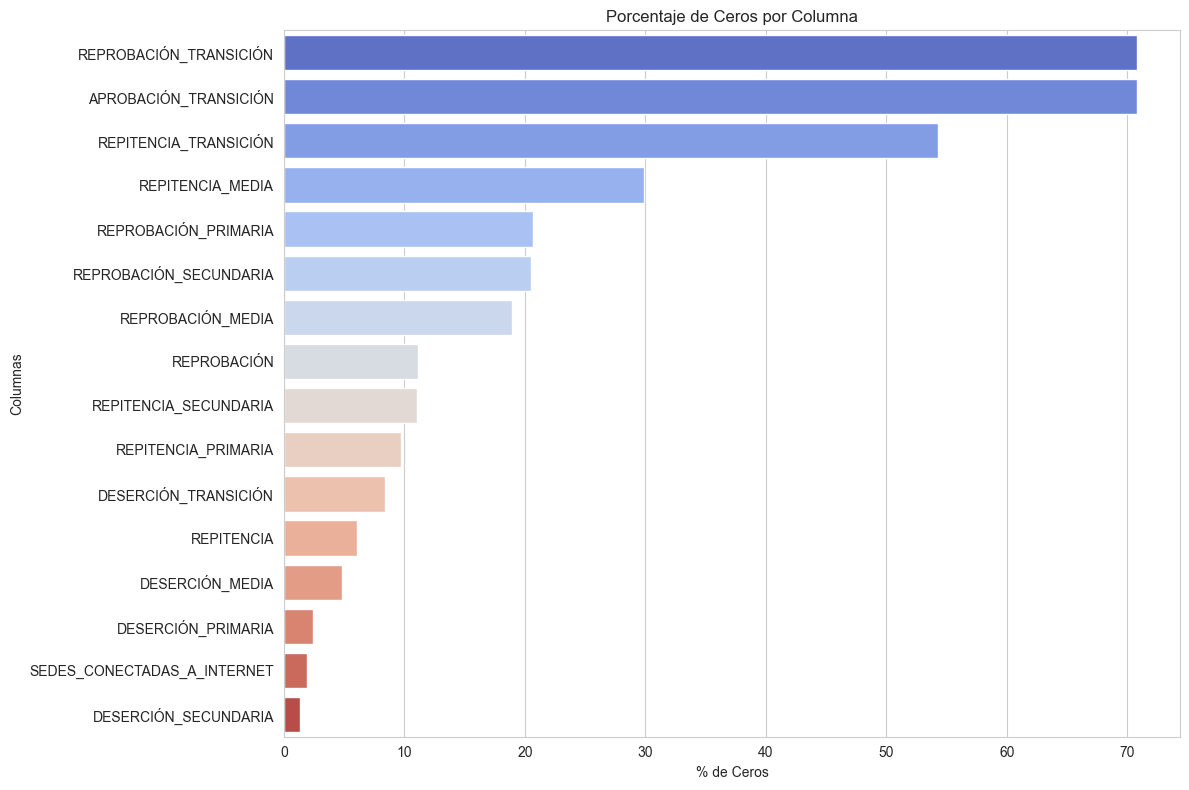

In [780]:
# Calcular % de ceros por columna
zero_counts = (data == 0).sum()
total_rows = len(data)
zero_percentage = (zero_counts / total_rows) * 100

# Crear DataFrame para visualización
zero_df = pd.DataFrame({
    'Columna': zero_counts.index,
    '% de Ceros': zero_percentage
}).sort_values('% de Ceros', ascending=False)

# Filtrar columnas con al menos 1% de ceros (puedes cambiar el umbral)
zero_df = zero_df[zero_df['% de Ceros'] > 1]

# Visualización con seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=zero_df, x='% de Ceros', y='Columna', palette='coolwarm')
plt.title('Porcentaje de Ceros por Columna')
plt.xlabel('% de Ceros')
plt.ylabel('Columnas')
plt.tight_layout()
plt.show()

In [781]:
# Tabla resumen por columna numérica
summary = pd.DataFrame({
    'Columna': data.columns,
    '% de Ceros': (data == 0).sum() / len(data) * 100,
    '% Nulos': data.isnull().sum() / len(data) * 100,
    'Valores Únicos': data.nunique()
}).sort_values(['% de Ceros', '% Nulos'], ascending=False)

# Agregar una sugerencia automatizada
summary['Sugerencia'] = summary.apply(
    lambda row: '❌ Revisar (muchos ceros/nulos o constante)' 
        if (row['% de Ceros'] > 50 or row['% Nulos'] > 50 or row['Valores Únicos'] <= 1)
    else '⚠️ Considerar (alta proporción de ceros o pocos valores)'
        if (row['% de Ceros'] > 30 or row['Valores Únicos'] <= 3)
    else '✅ Conservar', axis=1
)

# Mostrar las columnas más problemáticas primero
summary.reset_index(drop=True, inplace=True)
summary.head(41)  # Puedes cambiar el número de filas mostradas

,Columna,% de Ceros,% Nulos,Valores Únicos,Sugerencia
0,APROBACIÓN_TRANSICIÓN,70.826191,0.637641,660,❌ Revisar (muchos ceros/nulos o constante)
1,REPROBACIÓN_TRANSICIÓN,70.826191,0.637641,660,❌ Revisar (muchos ceros/nulos o constante)
2,REPITENCIA_TRANSICIÓN,54.268084,1.090161,876,❌ Revisar (muchos ceros/nulos o constante)
3,REPITENCIA_MEDIA,29.852588,0.953034,963,✅ Conservar
4,REPROBACIÓN_PRIMARIA,20.692492,0.665067,1487,✅ Conservar
5,REPROBACIÓN_SECUNDARIA,20.527940,0.726774,2211,✅ Conservar
6,REPROBACIÓN_MEDIA,18.964690,0.994172,1600,✅ Conservar
7,REPROBACIÓN,11.141584,0.589647,1569,✅ Conservar
8,REPITENCIA_SECUNDARIA,11.025026,1.042167,1770,✅ Conservar
9,REPITENCIA_PRIMARIA,9.729174,1.014741,1495,✅ Conservar


💡1.3.1 --- Hallazgos parciales --- 

🟠→ Las columnas 'TAMAÑO_PROMEDIO_DE_GRUPO' y 'SEDES_CONECTADAS_A_INTERNET' presentan 7013 y 6817 valores nulos respectivamentes, se eliminaron del dataset ya que no aportan significativamenta al problema/hipótesis tomado como objeto de estudio. 

🟠→  Las columnas 'APROBACIÓN_TRANSICIÓN' y 'REPROBACIÓN_TRANSICIÓN' están duplicadas, se decidió eliminar 'APROBACIÓN_TRANSICIÓN'.

🟠→  las columnas tipo id  o código se eliminaron ya que están representadas en otras columnas de diferente manera.Estas son: 'CÓDIGO_MUNICIPIO', 'CÓDIGO_DEPARTAMENTO'y 'CÓDIGO_ETC'.

🟠→  REPITENCIA_TRANSICIÓN en la tabla resumen por columna arroja una sugerencia de revisión, sin embargo debido a su significado, mientras más valores 0 (cero) tenga puede significar que los estudiantes en transición no repitieron periodo escolar. El 0 es el mejor valor ya que los casos de repitencia son bajos, entonces seguimos considerando hasta el momento esta columna para nuestro estudio.

🧼 1.4 Limpieza preliminar del dataset

Se eliminan las columnas 'CÓDIGO_MUNICIPIO', 'CÓDIGO_DEPARTAMENTO', 'CÓDIGO_ETC', 'APROBACIÓN_TRANSICIÓN', 'TAMAÑO_PROMEDIO_DE_GRUPO' y 'SEDES_CONECTADAS_A_INTERNET'

In [782]:
#Eliminar columnas no necesarias para el análisis
data = data.drop(columns=['CÓDIGO_MUNICIPIO', 'CÓDIGO_DEPARTAMENTO', 'CÓDIGO_ETC', 'APROBACIÓN_TRANSICIÓN','TAMAÑO_PROMEDIO_DE_GRUPO','SEDES_CONECTADAS_A_INTERNET'])

In [783]:
print("--- Primeras filas del DataFrame luego de eliminar columnas ---")
data.head()

--- Primeras filas del DataFrame luego de eliminar columnas ---


,AÑO,MUNICIPIO,DEPARTAMENTO,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2023,Medellín,Antioquia,Medellín,377562,96.15,95.94,81.42,94.01,83.58,...,9.23,0.15,6.21,15.40,7.27,9.25,1.82,8.34,13.69,4.48
1,2023,Abejorral,Antioquia,Antioquia (ETC),3634,74.38,74.38,50.55,74.32,63.78,...,7.77,0.56,7.26,10.93,4.41,9.07,1.67,10.28,11.32,2.20
2,2023,Abriaquí,Antioquia,Antioquia (ETC),503,62.62,62.62,44.19,63.33,51.53,...,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
3,2023,Alejandría,Antioquia,Antioquia (ETC),864,81.37,81.37,61.45,73.21,77.74,...,7.88,0.00,7.02,13.65,2.40,7.20,1.59,7.69,11.65,0.00
4,2023,Amagá,Antioquia,Antioquia (ETC),5060,78.30,78.30,67.65,76.96,65.61,...,10.71,0.00,9.63,16.48,5.50,12.08,0.29,11.54,18.48,3.98


In [784]:
print("--- Información de DataFrame luego de eliminar columnas ---")
data.info() 

--- Información de DataFrame luego de eliminar columnas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AÑO                         14585 non-null  int64  
 1   MUNICIPIO                   14585 non-null  object 
 2   DEPARTAMENTO                14585 non-null  object 
 3   ETC                         14585 non-null  object 
 4   POBLACIÓN_5_16              14579 non-null  object 
 5   TASA_MATRICULACIÓN_5_16     14470 non-null  float64
 6   COBERTURA_NETA              14474 non-null  float64
 7   COBERTURA_NETA_TRANSICIÓN   14533 non-null  float64
 8   COBERTURA_NETA_PRIMARIA     14494 non-null  float64
 9   COBERTURA_NETA_SECUNDARIA   14491 non-null  float64
 10  COBERTURA_NETA_MEDIA        14492 non-null  float64
 11  COBERTURA_BRUTA             14517 non-null  float64
 12  COBERTURA_BRUTA_TRANSICIÓN  

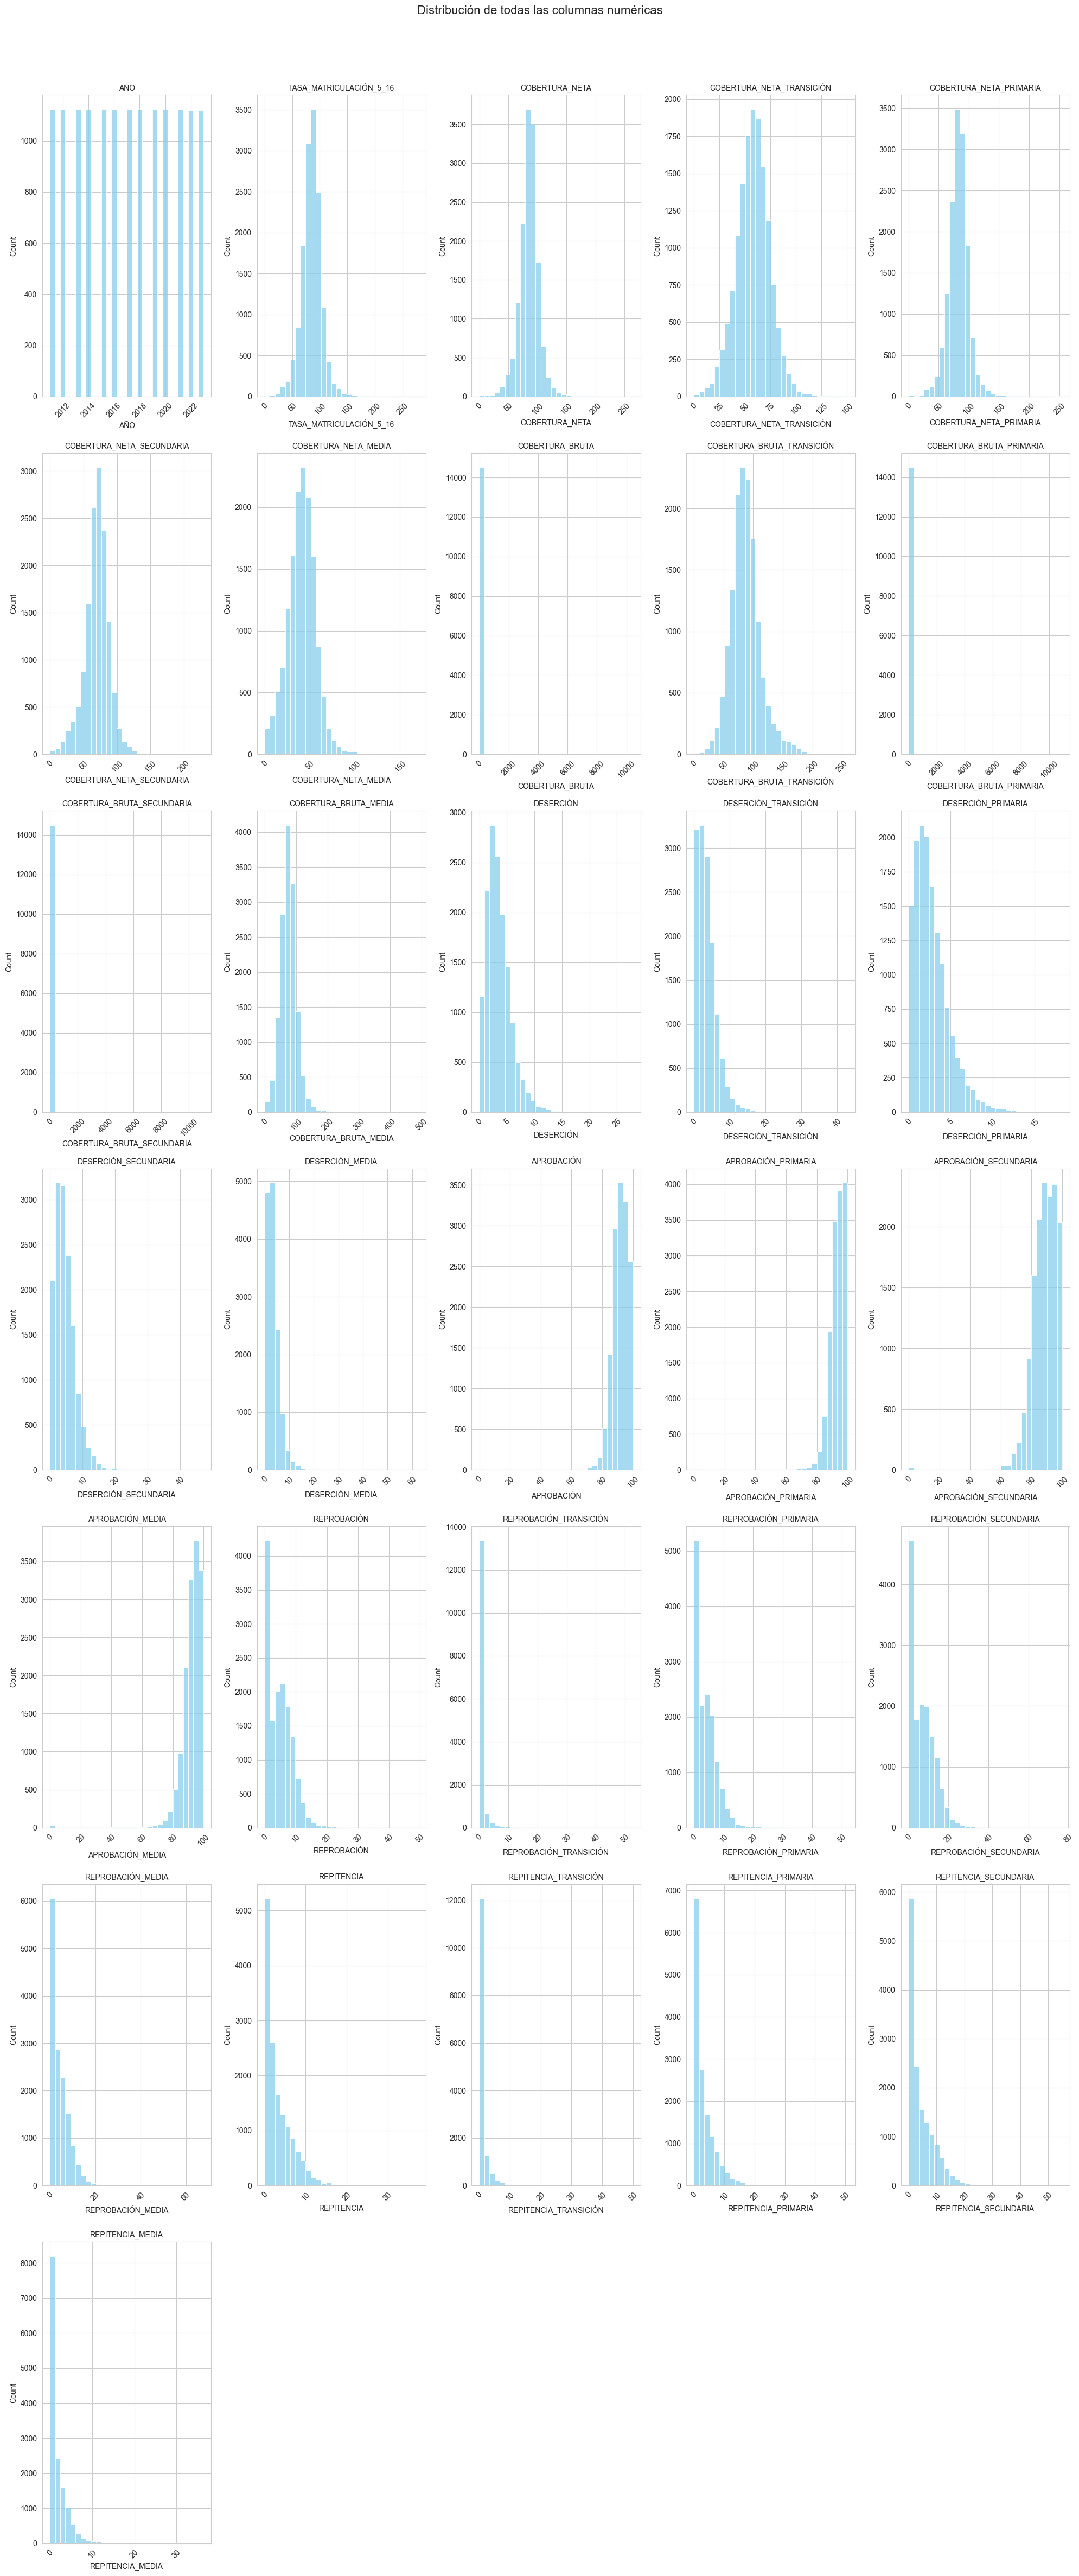

In [785]:
# Verificar la distribución de los datos en columnas numéricas
numeric_cols = data.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=(len(numeric_cols) // 5) + 1, ncols=5, figsize=(20, len(numeric_cols) * 1.5))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col].dropna(), kde=False, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribución de todas las columnas numéricas", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Dado que el gráfico muestra distribuciones asimétricas en varias variables, la imputación de valores nulos con la mediana es la estratégia más adecuada. A diferencia de la media, la mediana no se ve afectada por valores extremos, lo que permite una representación más robusta de la tendencia central de los datos. Usar la mediana garantiza que la imputación refleje mejor el patrón real de los datos sin distorsionar la variabilidad presente en el conjunto de datos.

🔢 1.5 --- Imputación de valores nulos en columnas ---

Observando que la columna 'POBLACIÓN_5_16' tiene el tipo de dato Object, procedemos a cambiarlo a int64. Luego se eliminaron carácteres extras, para finalmente imputar la mediana a los valores nulos del DataFrame.

In [786]:
#Convertir los datos de la columna 'POBLACIÓN_5_16' de object a int64
# Verificar valores únicos para identificar problemas
print(data['POBLACIÓN_5_16'].unique())

# Limpiar la columna eliminando caracteres extra y manejar valores no numéricos
data['POBLACIÓN_5_16'] = pd.to_numeric(data['POBLACIÓN_5_16'].str.replace(',', '').str.strip(), errors='coerce')

# Rellenar valores nulos con la mediana
data['POBLACIÓN_5_16'].fillna(data['POBLACIÓN_5_16'].median(), inplace=True)

# Convertir a entero
data['POBLACIÓN_5_16'] = data['POBLACIÓN_5_16'].astype(int)

# Verificar la conversión
print("--- Tipo de dato en columnas ---")
print(data.dtypes)

['377562' '3634' '503' ... '208' '4697' '25396']
--- Tipo de dato en columnas ---
AÑO                             int64
MUNICIPIO                      object
DEPARTAMENTO                   object
ETC                            object
POBLACIÓN_5_16                  int64
TASA_MATRICULACIÓN_5_16       float64
COBERTURA_NETA                float64
COBERTURA_NETA_TRANSICIÓN     float64
COBERTURA_NETA_PRIMARIA       float64
COBERTURA_NETA_SECUNDARIA     float64
COBERTURA_NETA_MEDIA          float64
COBERTURA_BRUTA               float64
COBERTURA_BRUTA_TRANSICIÓN    float64
COBERTURA_BRUTA_PRIMARIA      float64
COBERTURA_BRUTA_SECUNDARIA    float64
COBERTURA_BRUTA_MEDIA         float64
DESERCIÓN                     float64
DESERCIÓN_TRANSICIÓN          float64
DESERCIÓN_PRIMARIA            float64
DESERCIÓN_SECUNDARIA          float64
DESERCIÓN_MEDIA               float64
APROBACIÓN                    float64
APROBACIÓN_PRIMARIA           float64
APROBACIÓN_SECUNDARIA         float64
APROBA

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6740\3004672560.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['POBLACIÓN_5_16'].fillna(data['POBLACIÓN_5_16'].median(), inplace=True)


In [787]:
# Imputación del resto de las columnas numéricas con la mediana

# Seleccionar solo las columnas numéricas
columnas_numericas = data.select_dtypes(include=['number']).columns

# Reemplazar valores nulos con la mediana de cada columna numérica
data[columnas_numericas] = data[columnas_numericas].apply(lambda x: x.fillna(x.median()))

# Verificar que ya no haya valores nulos en ninguna de las columnas
print("--- Cantidad de valores nulos en columnas ---")
print(data.isnull().sum())

--- Cantidad de valores nulos en columnas ---
AÑO                           0
MUNICIPIO                     0
DEPARTAMENTO                  0
ETC                           0
POBLACIÓN_5_16                0
TASA_MATRICULACIÓN_5_16       0
COBERTURA_NETA                0
COBERTURA_NETA_TRANSICIÓN     0
COBERTURA_NETA_PRIMARIA       0
COBERTURA_NETA_SECUNDARIA     0
COBERTURA_NETA_MEDIA          0
COBERTURA_BRUTA               0
COBERTURA_BRUTA_TRANSICIÓN    0
COBERTURA_BRUTA_PRIMARIA      0
COBERTURA_BRUTA_SECUNDARIA    0
COBERTURA_BRUTA_MEDIA         0
DESERCIÓN                     0
DESERCIÓN_TRANSICIÓN          0
DESERCIÓN_PRIMARIA            0
DESERCIÓN_SECUNDARIA          0
DESERCIÓN_MEDIA               0
APROBACIÓN                    0
APROBACIÓN_PRIMARIA           0
APROBACIÓN_SECUNDARIA         0
APROBACIÓN_MEDIA              0
REPROBACIÓN                   0
REPROBACIÓN_TRANSICIÓN        0
REPROBACIÓN_PRIMARIA          0
REPROBACIÓN_SECUNDARIA        0
REPROBACIÓN_MEDIA         

In [788]:
#Visualizamos la información del dataset limpio
print("--- Información del Dataset limpio ---")
data.info()

--- Información del Dataset limpio ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AÑO                         14585 non-null  int64  
 1   MUNICIPIO                   14585 non-null  object 
 2   DEPARTAMENTO                14585 non-null  object 
 3   ETC                         14585 non-null  object 
 4   POBLACIÓN_5_16              14585 non-null  int64  
 5   TASA_MATRICULACIÓN_5_16     14585 non-null  float64
 6   COBERTURA_NETA              14585 non-null  float64
 7   COBERTURA_NETA_TRANSICIÓN   14585 non-null  float64
 8   COBERTURA_NETA_PRIMARIA     14585 non-null  float64
 9   COBERTURA_NETA_SECUNDARIA   14585 non-null  float64
 10  COBERTURA_NETA_MEDIA        14585 non-null  float64
 11  COBERTURA_BRUTA             14585 non-null  float64
 12  COBERTURA_BRUTA_TRANSICIÓN  14585 non-null  float

In [789]:
print("--- Primeras filas del dataset limpio ---")
data.head()

--- Primeras filas del dataset limpio ---


,AÑO,MUNICIPIO,DEPARTAMENTO,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2023,Medellín,Antioquia,Medellín,377562,96.15,95.94,81.42,94.01,83.58,...,9.23,0.15,6.21,15.40,7.27,9.25,1.82,8.34,13.69,4.48
1,2023,Abejorral,Antioquia,Antioquia (ETC),3634,74.38,74.38,50.55,74.32,63.78,...,7.77,0.56,7.26,10.93,4.41,9.07,1.67,10.28,11.32,2.20
2,2023,Abriaquí,Antioquia,Antioquia (ETC),503,62.62,62.62,44.19,63.33,51.53,...,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
3,2023,Alejandría,Antioquia,Antioquia (ETC),864,81.37,81.37,61.45,73.21,77.74,...,7.88,0.00,7.02,13.65,2.40,7.20,1.59,7.69,11.65,0.00
4,2023,Amagá,Antioquia,Antioquia (ETC),5060,78.30,78.30,67.65,76.96,65.61,...,10.71,0.00,9.63,16.48,5.50,12.08,0.29,11.54,18.48,3.98


In [790]:
print("--- Resumen estadístico del dataset ---")
data.describe()

--- Resumen estadístico del dataset ---


,AÑO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,COBERTURA_BRUTA,COBERTURA_BRUTA_TRANSICIÓN,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
count,14585.000000,1.458500e+04,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,...,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000
mean,2016.999383,1.025993e+04,84.974753,85.559640,57.693119,82.568374,69.911964,40.749642,99.684818,87.117530,...,4.755906,0.483706,3.881081,6.804289,4.120564,3.288308,0.932945,3.156419,4.309954,1.690000
std,3.741392,1.438920e+05,18.515703,16.867952,16.169711,17.149856,18.770316,15.579135,148.332951,25.481234,...,3.987754,1.648474,3.790058,6.131304,4.192024,3.355087,2.403920,3.627873,4.527839,2.274632
min,2011.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,1.165000e+03,74.940000,76.950000,47.570000,73.300000,60.490000,31.190000,85.730000,71.550000,...,0.940000,0.000000,0.430000,0.760000,0.680000,0.730000,0.000000,0.600000,0.740000,0.000000
50%,2017.000000,2.641000e+03,85.330000,86.400000,57.900000,82.830000,70.900000,41.165000,97.500000,85.210000,...,4.520000,0.000000,3.330000,6.160000,3.100000,2.160000,0.000000,1.880000,2.740000,0.870000
75%,2020.000000,5.866000e+03,95.300000,94.470000,68.000000,91.860000,80.500000,50.500000,109.200000,100.000000,...,7.390000,0.210000,5.980000,10.790000,6.360000,5.040000,0.920000,4.550000,6.770000,2.530000
max,2023.000000,9.548263e+06,279.030000,264.540000,150.470000,254.960000,229.440000,170.260000,10448.000000,259.290000,...,49.390000,52.710000,51.970000,76.970000,67.860000,37.470000,50.000000,50.760000,55.070000,36.450000


📈 --- 1.6 Analizar los valores atípicos de cada columna ---

In [791]:
cols_to_check = ['POBLACIÓN_5_16',
    'TASA_MATRICULACIÓN_5_16', 'COBERTURA_NETA', 'COBERTURA_NETA_TRANSICIÓN',
    'COBERTURA_NETA_PRIMARIA', 'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA',
    'COBERTURA_BRUTA', 'COBERTURA_BRUTA_TRANSICIÓN', 'COBERTURA_BRUTA_PRIMARIA',
    'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA',
    'DESERCIÓN', 'DESERCIÓN_TRANSICIÓN', 'DESERCIÓN_PRIMARIA',
    'DESERCIÓN_SECUNDARIA', 'DESERCIÓN_MEDIA','APROBACIÓN','APROBACIÓN_PRIMARIA','APROBACIÓN_SECUNDARIA','APROBACIÓN_MEDIA',
    'REPROBACIÓN', 'REPROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_PRIMARIA',
    'REPROBACIÓN_SECUNDARIA', 'REPROBACIÓN_MEDIA',
    'REPITENCIA', 'REPITENCIA_TRANSICIÓN', 'REPITENCIA_PRIMARIA',
    'REPITENCIA_SECUNDARIA', 'REPITENCIA_MEDIA'
]

# Crear una máscara booleana para detectar outliers usando el método IQR
outlier_mask = pd.DataFrame(False, index=data.index, columns=cols_to_check)

for col in cols_to_check:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask[col] = (data[col] < lower_bound) | (data[col] > upper_bound)

# Conteo de outliers por columna
outliers_count = outlier_mask.sum().sort_values(ascending=False)

# Filas que contienen al menos un valor atípico
rows_with_outliers = data[outlier_mask.any(axis=1)]

# Mostrar resumen
print("--- Valores atípicos detectados por columna (método IQR) ---:\n")
print(outliers_count)

--- Valores atípicos detectados por columna (método IQR) ---:

REPROBACIÓN_TRANSICIÓN        2748
REPITENCIA_TRANSICIÓN         1690
POBLACIÓN_5_16                1353
COBERTURA_NETA_SECUNDARIA      724
REPITENCIA_PRIMARIA            703
COBERTURA_NETA                 700
DESERCIÓN_MEDIA                627
COBERTURA_NETA_PRIMARIA        609
REPITENCIA_MEDIA               599
COBERTURA_BRUTA_PRIMARIA       581
COBERTURA_BRUTA_TRANSICIÓN     580
TASA_MATRICULACIÓN_5_16        566
COBERTURA_BRUTA                564
COBERTURA_BRUTA_SECUNDARIA     544
DESERCIÓN_TRANSICIÓN           477
DESERCIÓN_PRIMARIA             458
APROBACIÓN_MEDIA               396
DESERCIÓN_SECUNDARIA           388
COBERTURA_BRUTA_MEDIA          384
REPITENCIA                     370
DESERCIÓN                      369
REPITENCIA_SECUNDARIA          326
REPROBACIÓN_MEDIA              289
COBERTURA_NETA_MEDIA           256
APROBACIÓN_PRIMARIA            255
COBERTURA_NETA_TRANSICIÓN      251
REPROBACIÓN_PRIMARIA       

🗑️ 1.7 --- Eliminar filas y columnas ---

Eliminamos filas con valores 0 en todas las columnas y la columna POBLACIÓN_5_16.

In [792]:
# Lista de columnas con indicadores
cols_to_check = [
    'TASA_MATRICULACIÓN_5_16', 'COBERTURA_NETA', 'COBERTURA_NETA_TRANSICIÓN',
    'COBERTURA_NETA_PRIMARIA', 'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA',
    'COBERTURA_BRUTA', 'COBERTURA_BRUTA_TRANSICIÓN', 'COBERTURA_BRUTA_PRIMARIA',
    'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA',
    'DESERCIÓN', 'DESERCIÓN_TRANSICIÓN', 'DESERCIÓN_PRIMARIA',
    'DESERCIÓN_SECUNDARIA', 'DESERCIÓN_MEDIA',
    'REPROBACIÓN', 'REPROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_PRIMARIA',
    'REPROBACIÓN_SECUNDARIA', 'REPROBACIÓN_MEDIA',
    'REPITENCIA', 'REPITENCIA_TRANSICIÓN', 'REPITENCIA_PRIMARIA',
    'REPITENCIA_SECUNDARIA', 'REPITENCIA_MEDIA'
]

# Filtrar registros donde todos esos indicadores son cero
mask_ceros = data[cols_to_check].eq(0).all(axis=1)
municipios_con_datos_en_cero = data[mask_ceros]

print(f" --- Total de registros con todos los indicadores en cero: {municipios_con_datos_en_cero.shape[0]} ---")
print("\nUbicación de los registros con datos en cero:\n")
print(municipios_con_datos_en_cero[['AÑO', 'DEPARTAMENTO', 'MUNICIPIO']].drop_duplicates())

 --- Total de registros con todos los indicadores en cero: 3 ---

Ubicación de los registros con datos en cero:

        AÑO DEPARTAMENTO MUNICIPIO
1115   2023       Vaupés  Papunaua
13238  2021       Vaupés  Papunaua
14579  2022       Vaupés  Papunaua


Estos son registros se eliminan del dataset ya que no aportan al análisis.

In [793]:
# Eliminar filas por índice
data = data.drop([1115, 13238, 14579])
print("total de registros en data después de la eliminación",data.shape)

total de registros en data después de la eliminación (14582, 35)


In [794]:
#Eliminamos la columna POBLACIÓN_5_16
data.drop(columns=['POBLACIÓN_5_16'],inplace=True)

In [795]:
print("--- Primeras filas del dataset ---")
data.head()

--- Primeras filas del dataset ---


,AÑO,MUNICIPIO,DEPARTAMENTO,ETC,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2023,Medellín,Antioquia,Medellín,96.15,95.94,81.42,94.01,83.58,57.69,...,9.23,0.15,6.21,15.40,7.27,9.25,1.82,8.34,13.69,4.48
1,2023,Abejorral,Antioquia,Antioquia (ETC),74.38,74.38,50.55,74.32,63.78,40.95,...,7.77,0.56,7.26,10.93,4.41,9.07,1.67,10.28,11.32,2.20
2,2023,Abriaquí,Antioquia,Antioquia (ETC),62.62,62.62,44.19,63.33,51.53,40.23,...,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
3,2023,Alejandría,Antioquia,Antioquia (ETC),81.37,81.37,61.45,73.21,77.74,73.08,...,7.88,0.00,7.02,13.65,2.40,7.20,1.59,7.69,11.65,0.00
4,2023,Amagá,Antioquia,Antioquia (ETC),78.30,78.30,67.65,76.96,65.61,38.82,...,10.71,0.00,9.63,16.48,5.50,12.08,0.29,11.54,18.48,3.98


Al analizar los datos, identificamos inconsistencias en la columna DEPARTAMENTO. Algunos municipios, aunque eran los mismos, aparecían escritos con variaciones en los carácteres, como puntos (.) o comas (,), lo que generaba duplicidades y errores en el análisis.

In [796]:
# Visualizar todos los departamentos
print(data['DEPARTAMENTO'].unique())

['Antioquia' 'Atlántico' 'Bogotá, D.C.' 'Bolívar' 'Boyacá' 'Caldas'
 'Caquetá' 'Cauca' 'Cesar' 'Córdoba' 'Cundinamarca' 'Chocó' 'Huila'
 'La Guajira' 'Magdalena' 'Meta' 'Nariño' 'Norte de Santander' 'Quindio'
 'Risaralda' 'Santander' 'Sucre' 'Tolima' 'Valle del Cauca' 'Arauca'
 'Casanare' 'Putumayo'
 'Archipiélago de San Andrés, Providencia y Santa Catalina' 'Amazonas'
 'Guainía' 'Guaviare' 'Vaupés' 'Vichada' 'NACIONAL' 'Bogotá D.C.'
 'Archipiélago de San Andrés. Providencia y Santa Catalina']


In [797]:
# Corregir los nombres de los departamentos
# Diccionario con las correcciones necesarias
correcciones = {
    'Bogotá D.C.': 'Bogotá, D.C.',
    'Archipiélago de San Andrés. Providencia y Santa Catalina': 'Archipiélago de San Andrés, Providencia y Santa Catalina'
}

# Aplicar reemplazo exacto
data['DEPARTAMENTO'] = data['DEPARTAMENTO'].replace(correcciones)

# Verificamos que solo queden las versiones correctas
print(data['DEPARTAMENTO'].unique())


['Antioquia' 'Atlántico' 'Bogotá, D.C.' 'Bolívar' 'Boyacá' 'Caldas'
 'Caquetá' 'Cauca' 'Cesar' 'Córdoba' 'Cundinamarca' 'Chocó' 'Huila'
 'La Guajira' 'Magdalena' 'Meta' 'Nariño' 'Norte de Santander' 'Quindio'
 'Risaralda' 'Santander' 'Sucre' 'Tolima' 'Valle del Cauca' 'Arauca'
 'Casanare' 'Putumayo'
 'Archipiélago de San Andrés, Providencia y Santa Catalina' 'Amazonas'
 'Guainía' 'Guaviare' 'Vaupés' 'Vichada' 'NACIONAL']


In [798]:
#Finalmente en esta etapa corroboramos la cantidad de registros por departamento
# Contar la cantidad de registros por departamento
conteo_departamentos = data['DEPARTAMENTO'].value_counts().reset_index()

# Renombrar columnas para mayor claridad
conteo_departamentos.columns = ['DEPARTAMENTO', 'TOTAL_REGISTROS']

# Ordenar de mayor a menor cantidad de registros
conteo_departamentos = conteo_departamentos.sort_values(by='TOTAL_REGISTROS', ascending=False)

# Calcular el total de registros
total_registros = conteo_departamentos['TOTAL_REGISTROS'].sum()

# Agregar fila con el total
conteo_departamentos.loc[len(conteo_departamentos)] = ['TOTAL', total_registros]

# Mostrar el listado
print("--- Total de registros por Departamento ---")
print(conteo_departamentos)

# Opcional: Guardar en un CSV para análisis posterior
conteo_departamentos.to_csv("conteo_departamentos.csv", index=False)


--- Total de registros por Departamento ---
                                         DEPARTAMENTO  TOTAL_REGISTROS
0                                           Antioquia             1625
1                                              Boyacá             1599
2                                        Cundinamarca             1508
3                                           Santander             1131
4                                              Nariño              832
5                                              Tolima              611
6                                             Bolívar              598
7                                               Cauca              546
8                                     Valle del Cauca              546
9                                  Norte de Santander              520
10                                              Huila              481
11                                              Chocó              390
12                               

In [799]:
#Para generar el dataset limpio completamente, eliminamos las filas "NACIONAL" que contiene la suma de todos los departamentos y para nuetros análisis no serán necesarias.
data = data[data['DEPARTAMENTO'] != 'NACIONAL']
data.shape
#Guardar dataset limpio
data.to_csv("data.csv", index=False)

📊 --- 1.8 Dataset definitivo para dar respuesta al problema planteado ---

In [800]:
print(" ---Dataset definitiva ---")
data.head()

 ---Dataset definitiva ---


,AÑO,MUNICIPIO,DEPARTAMENTO,ETC,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2023,Medellín,Antioquia,Medellín,96.15,95.94,81.42,94.01,83.58,57.69,...,9.23,0.15,6.21,15.40,7.27,9.25,1.82,8.34,13.69,4.48
1,2023,Abejorral,Antioquia,Antioquia (ETC),74.38,74.38,50.55,74.32,63.78,40.95,...,7.77,0.56,7.26,10.93,4.41,9.07,1.67,10.28,11.32,2.20
2,2023,Abriaquí,Antioquia,Antioquia (ETC),62.62,62.62,44.19,63.33,51.53,40.23,...,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
3,2023,Alejandría,Antioquia,Antioquia (ETC),81.37,81.37,61.45,73.21,77.74,73.08,...,7.88,0.00,7.02,13.65,2.40,7.20,1.59,7.69,11.65,0.00
4,2023,Amagá,Antioquia,Antioquia (ETC),78.30,78.30,67.65,76.96,65.61,38.82,...,10.71,0.00,9.63,16.48,5.50,12.08,0.29,11.54,18.48,3.98


# 📊 2 --- Respuestas a Objetivos Específicos ---

✅ 2.1 --- Comparar la evolución de la cobertura neta y bruta antes, durante y después de la pandemia en los distintos niveles (transición, primaria, secundaria y media) para detectar cambios en el acceso y matriculación de estudiantes ---

Para dar respuesta a este primer objetivo específico, visualizamos como se comportó en general la tasa de cobertura neta y bruta en los periodos segmentados en "Pre-pandemia" (2015-2019), "Pandemia" (2020-2021) y "Postpandemia" (2022-2023).
Además separamos en dos gráficas el comportamiento de la tasa de cobertura neta y bruta en los distintos nivles de escolaridad (transición, primaria, media y secundaria)

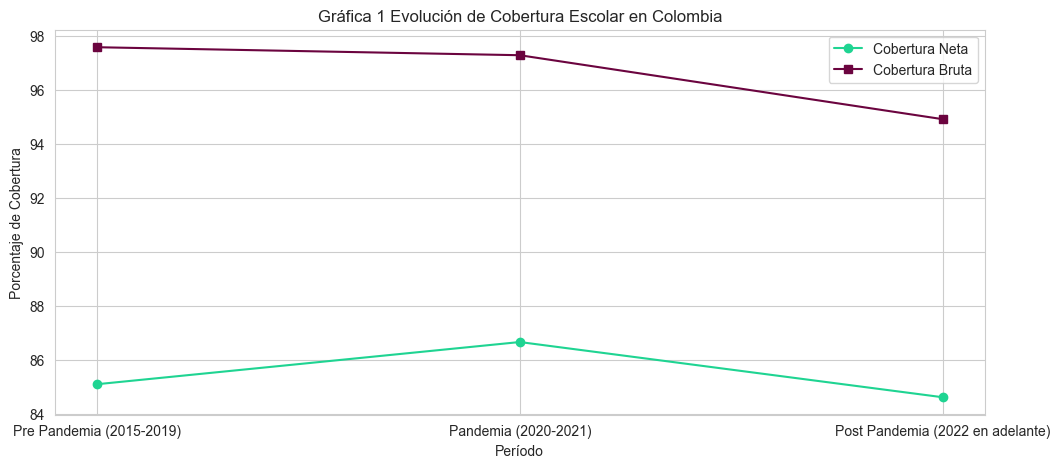

In [801]:
# Visualizamos la evolución de la cobertura escolar
# Filtramos los datos por períodos clave
pre_pandemia = data[data['AÑO'].between(2015, 2019)]
pandemia = data[data['AÑO'].isin([2020, 2021])]
post_pandemia = data[data['AÑO'] >= 2022]

# Calcular promedio de cobertura bruta y neta por período
promedios = pd.DataFrame({
    'Período': ['Pre Pandemia (2015-2019)', 'Pandemia (2020-2021)', 'Post Pandemia (2022 en adelante)'],
    'Cobertura Neta': [pre_pandemia['COBERTURA_NETA'].mean(), pandemia['COBERTURA_NETA'].mean(), post_pandemia['COBERTURA_NETA'].mean()],
    'Cobertura Bruta': [pre_pandemia['COBERTURA_BRUTA'].mean(), pandemia['COBERTURA_BRUTA'].mean(), post_pandemia['COBERTURA_BRUTA'].mean()]
})

# Gráfico de evolución
plt.figure(figsize=(12,5))
plt.plot(promedios['Período'], promedios['Cobertura Neta'], marker='o', label='Cobertura Neta', color= "#1FD492")
plt.plot(promedios['Período'], promedios['Cobertura Bruta'], marker='s', label='Cobertura Bruta', color="#6B043F")
plt.xlabel("Período")
plt.ylabel("Porcentaje de Cobertura")
plt.title("Gráfica 1 Evolución de Cobertura Escolar en Colombia")
plt.legend()
plt.show()

In [802]:
# Seleccionar columnas relevantes
cobertura_cols = [
    'AÑO', 'COBERTURA_NETA_TRANSICIÓN', 'COBERTURA_NETA_PRIMARIA',
    'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA',
    'COBERTURA_BRUTA_TRANSICIÓN', 'COBERTURA_BRUTA_PRIMARIA',
    'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA'
]

df_cobertura = data[cobertura_cols].copy()

# Agrupar por año y calcular promedios nacionales
df_cobertura_grouped = df_cobertura.groupby('AÑO').mean(numeric_only=True).reset_index()

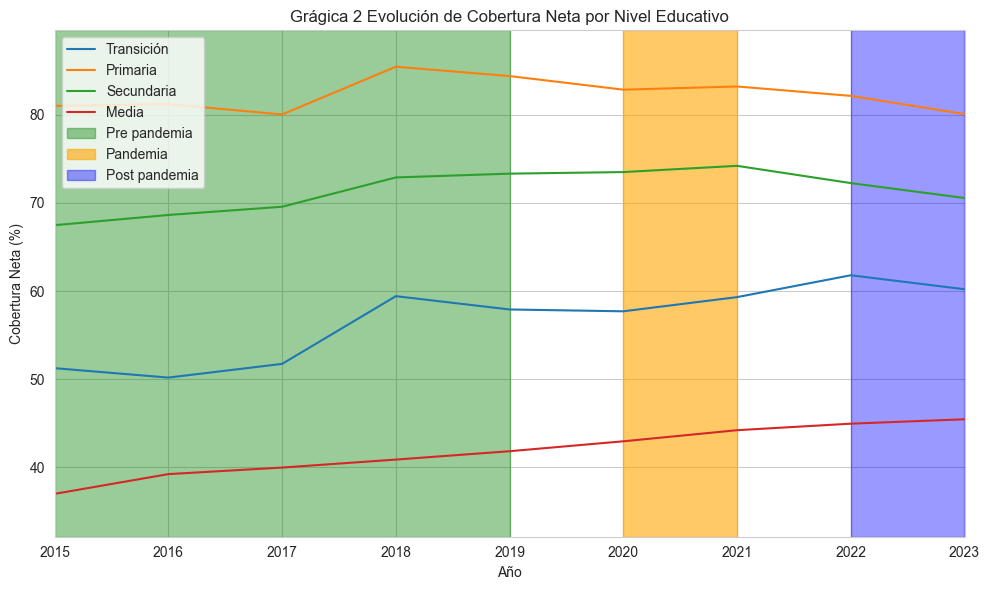

In [803]:
#Visualizar la cobertura neta por nivel de escolaridad
plt.figure(figsize=(10, 6))
for col in ['COBERTURA_NETA_TRANSICIÓN', 'COBERTURA_NETA_PRIMARIA', 'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA']:
    plt.plot(df_cobertura_grouped['AÑO'], df_cobertura_grouped[col], label=col.replace('COBERTURA_NETA_', '').capitalize())

# Obtener años disponibles
años = df_cobertura_grouped['AÑO'].unique()
año_min = max(años.min(), 2015)  # Ejemplo, iniciar desde 2015 o desde mínimo disponible
año_max = años.max()

plt.xlim(año_min, año_max)
plt.xticks(np.arange(año_min, año_max+1, 1))  # ticks cada año

# Áreas sombreadas más visibles
plt.axvspan(año_min, 2019, color='green', alpha=0.4, label='Pre pandemia')
plt.axvspan(2020, 2021, color='orange', alpha=0.6, label='Pandemia')
plt.axvspan(2022, año_max, color='blue', alpha=0.4, label='Post pandemia')

plt.title('Grágica 2 Evolución de Cobertura Neta por Nivel Educativo')
plt.xlabel('Año')
plt.ylabel('Cobertura Neta (%)')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.grid(True)
plt.tight_layout()
plt.show()

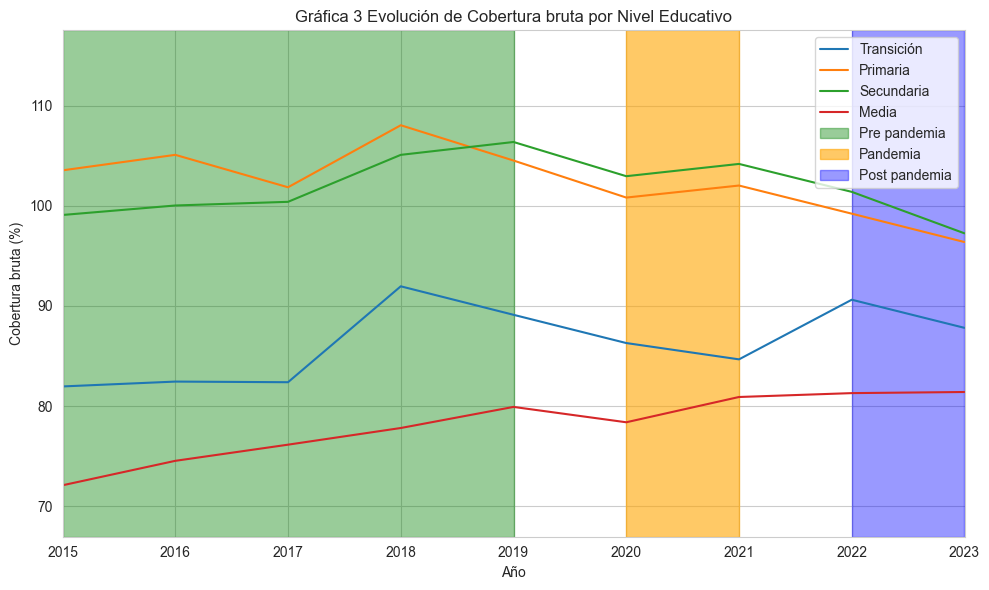

In [804]:
#Visualizar la cobertura bruta por nivel de escolaridad

plt.figure(figsize=(10, 6))

for col in ['COBERTURA_BRUTA_TRANSICIÓN', 'COBERTURA_BRUTA_PRIMARIA', 'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA']:
    plt.plot(df_cobertura_grouped['AÑO'], df_cobertura_grouped[col], label=col.replace('COBERTURA_BRUTA_', '').capitalize())

# Obtener años disponibles
años = df_cobertura_grouped['AÑO'].unique()
año_min = max(años.min(), 2015) #Se puede cambiar el año
año_max = años.max()

plt.xlim(año_min, año_max)
plt.xticks(np.arange(año_min, año_max+1, 1)) 

# Áreas sombreadas
plt.axvspan(año_min, 2019, color='green', alpha=0.4, label='Pre pandemia')
plt.axvspan(2020, 2021, color='orange', alpha=0.6, label='Pandemia')
plt.axvspan(2022, año_max, color='blue', alpha=0.4, label='Post pandemia')

plt.title('Gráfica 3 Evolución de Cobertura bruta por Nivel Educativo')
plt.xlabel('Año')
plt.ylabel('Cobertura bruta (%)')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.grid(True)
plt.tight_layout()
plt.show()

💡2.1.1 --- Hallazgos claves en la evolución de la cobertura escolar ---

📉 Reducción progresiva en la cobertura escolar después de la pandemia -  Gráfica 1 "Evolución de Cobertura Escolar en Colombia".

 - En la Gráfica 1 "Evolución de Cobertura Escolar en Colombia" se observa una disminución constante en la cobertura bruta y la cobertura neta a lo largo de la Pandemia y Post Pandemia.

 - La cobertura bruta tuvo una caída más pronunciada, pasando de cerca de 110% en Pre Pandemia a aproximadamente 100% en Post Pandemia.

 - La cobertura neta también muestra una tendencia decreciente, de alrededor de 87% antes de la pandemia a 83% después de la pandemia.

 - Se nota un mayor impacto en la cobertura bruta.

 - La caída en cobertura bruta sugiere una menor inscripción de estudiantes en relación con la población en edad escolar de 5 a 16 años.
 
 -  Esto podría estar asociado con factores como dificultades económicas, cambios en la estructura educativa y barreras en el acceso a la educación durante la Pandemia, debido al aumento repentino del uso de la virtualidad para evitar contagios del virus COVID-19 y sus variantes.


📉 Tendencia a la baja en la cobertura neta - Gráfica 2 "Evolución de Cobertura Neta por Nivel Educativo"

 - La cobertura neta refleja la relación entre el número de estudiantes (inscritos/matriculados) que corresponden a la edad de 5 a 16 años y el total de la población en ese mismo grupo de edades.  

 - Observando la Gráfica 2 "Evolución de Cobertura Neta por Nivel Educativo", se nota que la cobertura neta muestra una reducción progresiva durante la Pandemia, a pesar de que su impacto es más estable si la comparamos con la cobertura bruta.
 
 - Aunque la cobertura neta no disminuye de forma drástica, el descenso podría indicar que menos estudiantes están completando su ciclo educativo.

 - Esta situación podría estar relacionada con incrementos en la deserción escolar y posibles interrupciones en la continuidad académica.


⚠️ Descenso considerable en la cobertura bruta - Gráfica 3 "Evolución de Cobertura Bruta por Nivel Educativo"
 
- La cobertura bruta refleja la cantidad total de estudiantes matriculados, incluyendo posibles repitentes, mientras que la neta indica el porcentaje de estudiantes que están en el grado correspondiente a su edad.

 - Una caída marcada en la cobertura bruta puede indicar que menos estudiantes entraron al sistema escolar, lo que podría relacionarse con obstáculos como factores económicos, acceso a educación virtual o cambios en políticas educativas.

 - La cobertura bruta tuvo una caída más pronunciada (Gráfica 3), pasando de aproximadamente 110% en Pre Pandemia (área del gráfico sombreada con color verde) a aproximadamente 100% en Post Pandemia (área color violeta). La pandemia interrumpió el crecimiento o estabilidad que venía dándose en cobertura bruta.
 
 - El impacto es más fuerte en niveles iniciales (transición) y básicos (primaria y secundaria). El nivel media parece ser el menos afectado.


✅ 2.2 --- Evaluar la relación entre la deserción escolar y factores como repitencia y reprobación en el periodo 2020-2022 y su variación respecto a los años anteriores ---

Evaluamos con una gráfica las tendencias en la deserción, repitencia y reprobación.

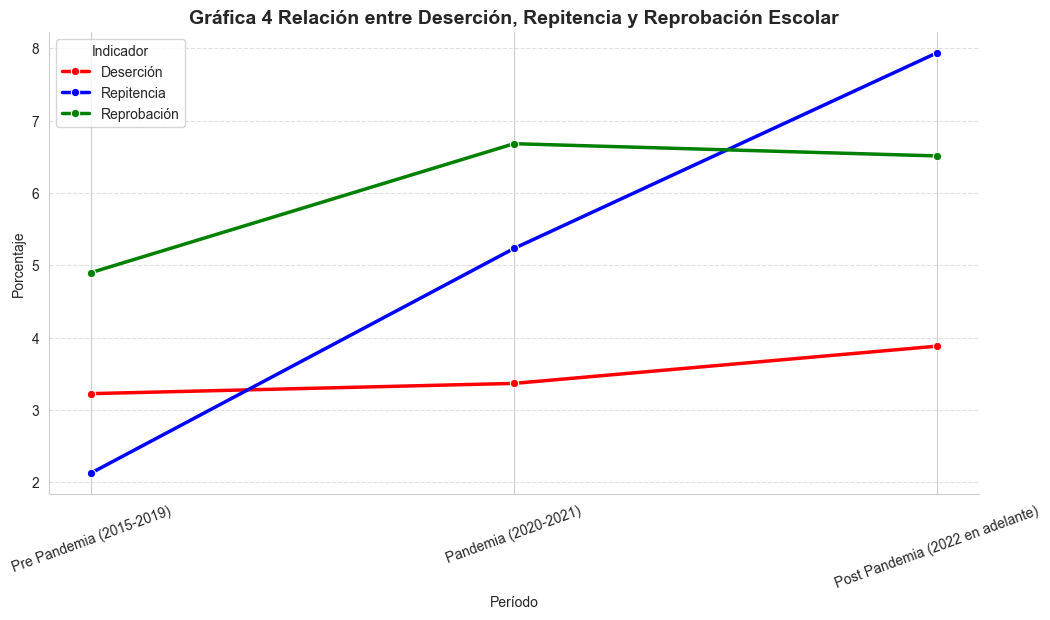

In [805]:
# Filtrar datos por períodos clave
pre_pandemia = data[data['AÑO'].between(2015, 2019)]
pandemia = data[data['AÑO'].isin([2020, 2021])]
post_pandemia = data[data['AÑO'] >= 2022]

# Variables a analizar
resultados = pd.DataFrame({
    'Período': ['Pre Pandemia (2015-2019)', 'Pandemia (2020-2021)', 'Post Pandemia (2022 en adelante)'],
    'Deserción': [pre_pandemia['DESERCIÓN'].mean(), pandemia['DESERCIÓN'].mean(), post_pandemia['DESERCIÓN'].mean()],
    'Repitencia': [pre_pandemia['REPITENCIA'].mean(), pandemia['REPITENCIA'].mean(), post_pandemia['REPITENCIA'].mean()],
    'Reprobación': [pre_pandemia['REPROBACIÓN'].mean(), pandemia['REPROBACIÓN'].mean(), post_pandemia['REPROBACIÓN'].mean()]
})


sns.set_style("whitegrid")

# Crear gráfica
plt.figure(figsize=(12,6)) 
ax = sns.lineplot(data=resultados.melt(id_vars='Período', var_name='Indicador', value_name='Valor'), 
                  x='Período', y='Valor', hue='Indicador', marker='o', linewidth=2.5, 
                  palette={'Deserción': 'red', 'Repitencia': 'blue', 'Reprobación': 'green'})

plt.title("Gráfica 4 Relación entre Deserción, Repitencia y Reprobación Escolar", fontsize=14, fontweight='bold')
plt.xlabel("Período")
plt.ylabel("Porcentaje")
plt.xticks(rotation=20)
plt.legend(title="Indicador", fontsize=10)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


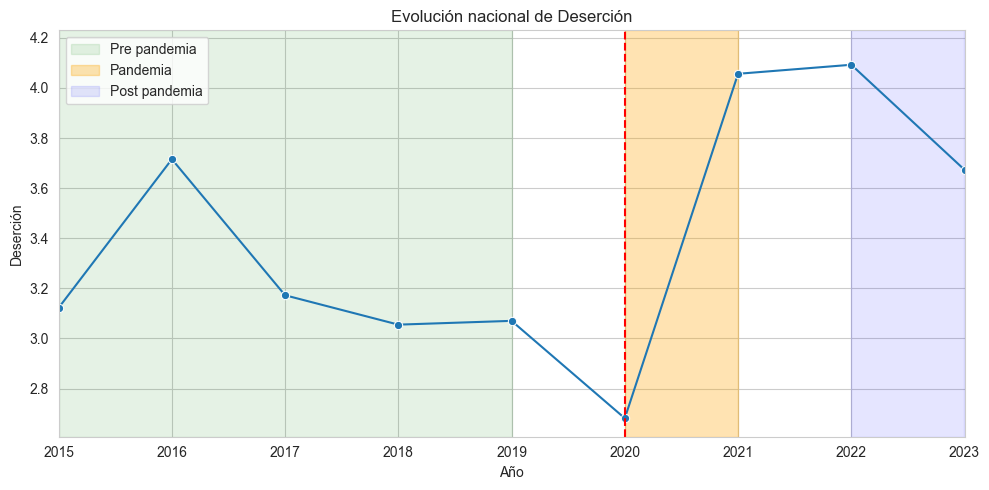

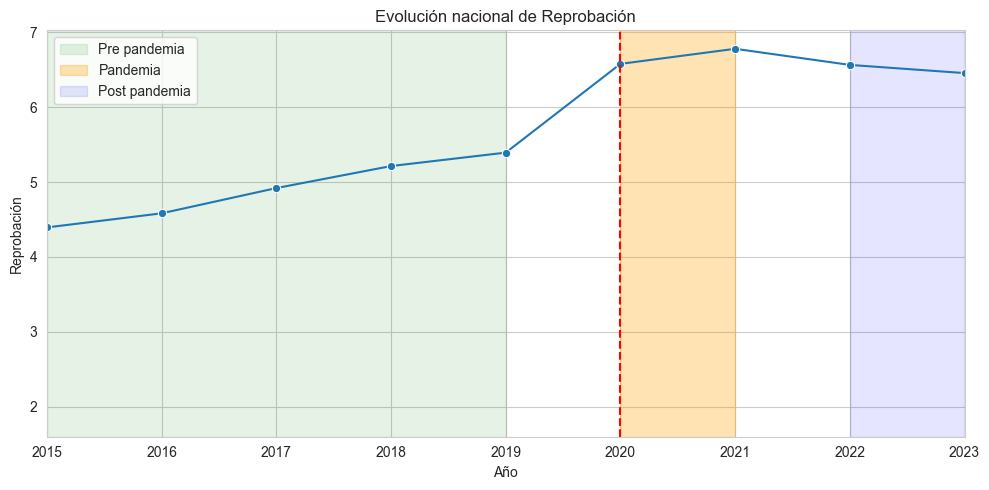

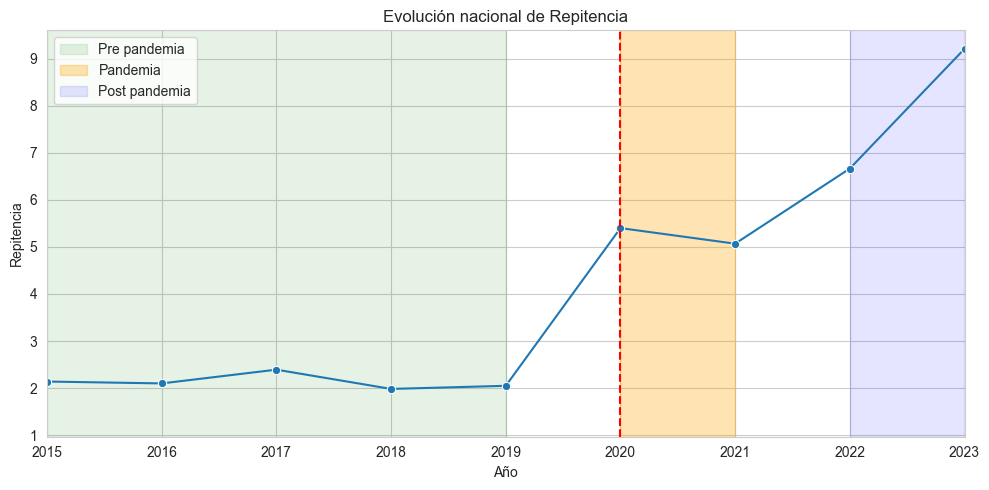

In [806]:
# Evaluar individualmnte la evolución de la cobertura bruta, deserción, aprobación, reprobación y repitencia
columnas_analisis = [
    "DESERCIÓN",
    "REPROBACIÓN", "REPITENCIA"
]
for col in columnas_analisis:
    plt.figure(figsize=(10, 5))

    # Agrupar y calcular promedio por año
    datos = data.groupby("AÑO")[col].mean()

    # Forzar año mínimo 2015
    año_min = 2015
    año_max = datos.index.max()

    # Línea de datos
    sns.lineplot(x=datos.index, y=datos.values, marker="o")

    # Áreas sombreadas
    plt.axvspan(año_min, 2019, color='green', alpha=0.1, label='Pre pandemia')
    plt.axvspan(2020, 2021, color='orange', alpha=0.3, label='Pandemia')
    plt.axvspan(2022, año_max, color='blue', alpha=0.1, label='Post pandemia')

    # Línea vertical para inicio de pandemia
    plt.axvline(2020, color='red', linestyle='--')

    # Título y etiquetas
    plt.title(f"Evolución nacional de {col.replace('_', ' ').title()}")
    plt.ylabel(col.replace('_', ' ').title())
    plt.xlabel("Año")


    plt.xlim(año_min, año_max)

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.grid(True)
    plt.tight_layout()

💡2.2.1 --- Hallazgos claves en la relación entre la deserción, repitencia y reprobación escolar ---
 
📉 Gráfica 1 Relación entre Deserción, Repitencia y Reprobación Escolar.

- Se observa que en la deserción escolar se presentó un leve crecimiento, aunque no es drástico indica una tendencia negativa, sugiriendo que algunos estudiantes que decidieron desertar.

- La repitencia presenta un aumento significativo en cada periodo, lo que sugiere que los estudiantes pudieron tener dificultades académicas para alcanzar los estándares académicos luego del retorno a la presencialidad.

- En la reprobación se observa una subida durante la pandemia, alcanzando su pico dentro de este periodo. En el periodo post pandemia se nota un ligero descenso, sin embargo, su baja representa niveles más altos que los observados en el periodo pre pandemia.

⚠️ La repitencia es el indicador que más se vió afectado, y esto puede reflejar brechas de aprendizaje acumuladas durante la educación remota. Aunque la deserción sigue una línea ascendente, su crecimiento es más controlado, mientras que la reprobación parece estar estabilizado tras un aumento inicial.

📉 Gráfica Evolución Nacional de Deserción

- Durante el periodo pre-pandemia la tasa de deserción se mantuvo relativamente estable, con leves disminuciones a lo largo de los años.

- Durante la pandemia en 2020, año del confinamiento, se registró el valor más bajo de toda la serie (2.68%). Esto puede explicarse por la falta de reportes inmediatos de deserción por parte de muchas instituciones educativas. Sin embargo, en 2021 se observa un aumento brusco que continúa hasta 2022, lo cual sugiere que la pandemia afectó diversos factores en la trayectoria educativa de los estudiantes, generando una ola de deserciones postergadas.

- En la post-pandemia aunque la tasa muestra una leve disminución, aún no retorna a los niveles previos a la pandemia. Esto refleja una persistencia del impacto educativo generado por la crisis sanitaria.

 📉 Gráfica Evolución Nacional de Reprobación

- En el periodo de pre-pandemia se observa una tendencia de incrementos leves y sostenidos año tras año.

- Durante la pandemia, en 2019 ya se registraba un aumento significativo, el cual se acentúa en 2020 durante el confinamiento, alcanzando un pico del 6.8%. Este comportamiento sugiere que el confinamiento profundizó las dificultades de aprendizaje existentes.

- En post-pandemia no se evidencia una disminución clara en los niveles de reprobación, lo que indica una posible persistencia de las brechas educativas generadas o exacerbadas durante la crisis sanitaria.

 📉 Gráfica Evolución Nacional de Repitencia

- La tasa de repitencia se mantuvo relativamente estable en la pre pandemia, con un ligero aumento en el año 2017.

- Se observa un incremento considerable en el año 2020, coincidiendo con el periodo de confinamiento debido a la pandemia. En 2021, con el retorno gradual a clases, se registra una leve disminución. Sin embargo, en 2022 vuelve a incrementarse, superando incluso los niveles observados durante el confinamiento.

- Periodo post-pandemia: La repitencia alcanza su punto más alto en 2023, con un 9.3%. Este aumento podría estar relacionado con dificultades de adaptación, estudiantes que intentaron retomar sus estudios sin éxito, entre otros factores contextuales.

✅ 2.3 --- Visualizar los datos analizados con respecto a las variaciones en cobertura y deserción escolar teniendo en cuenta los departamentos a nivel nacional---

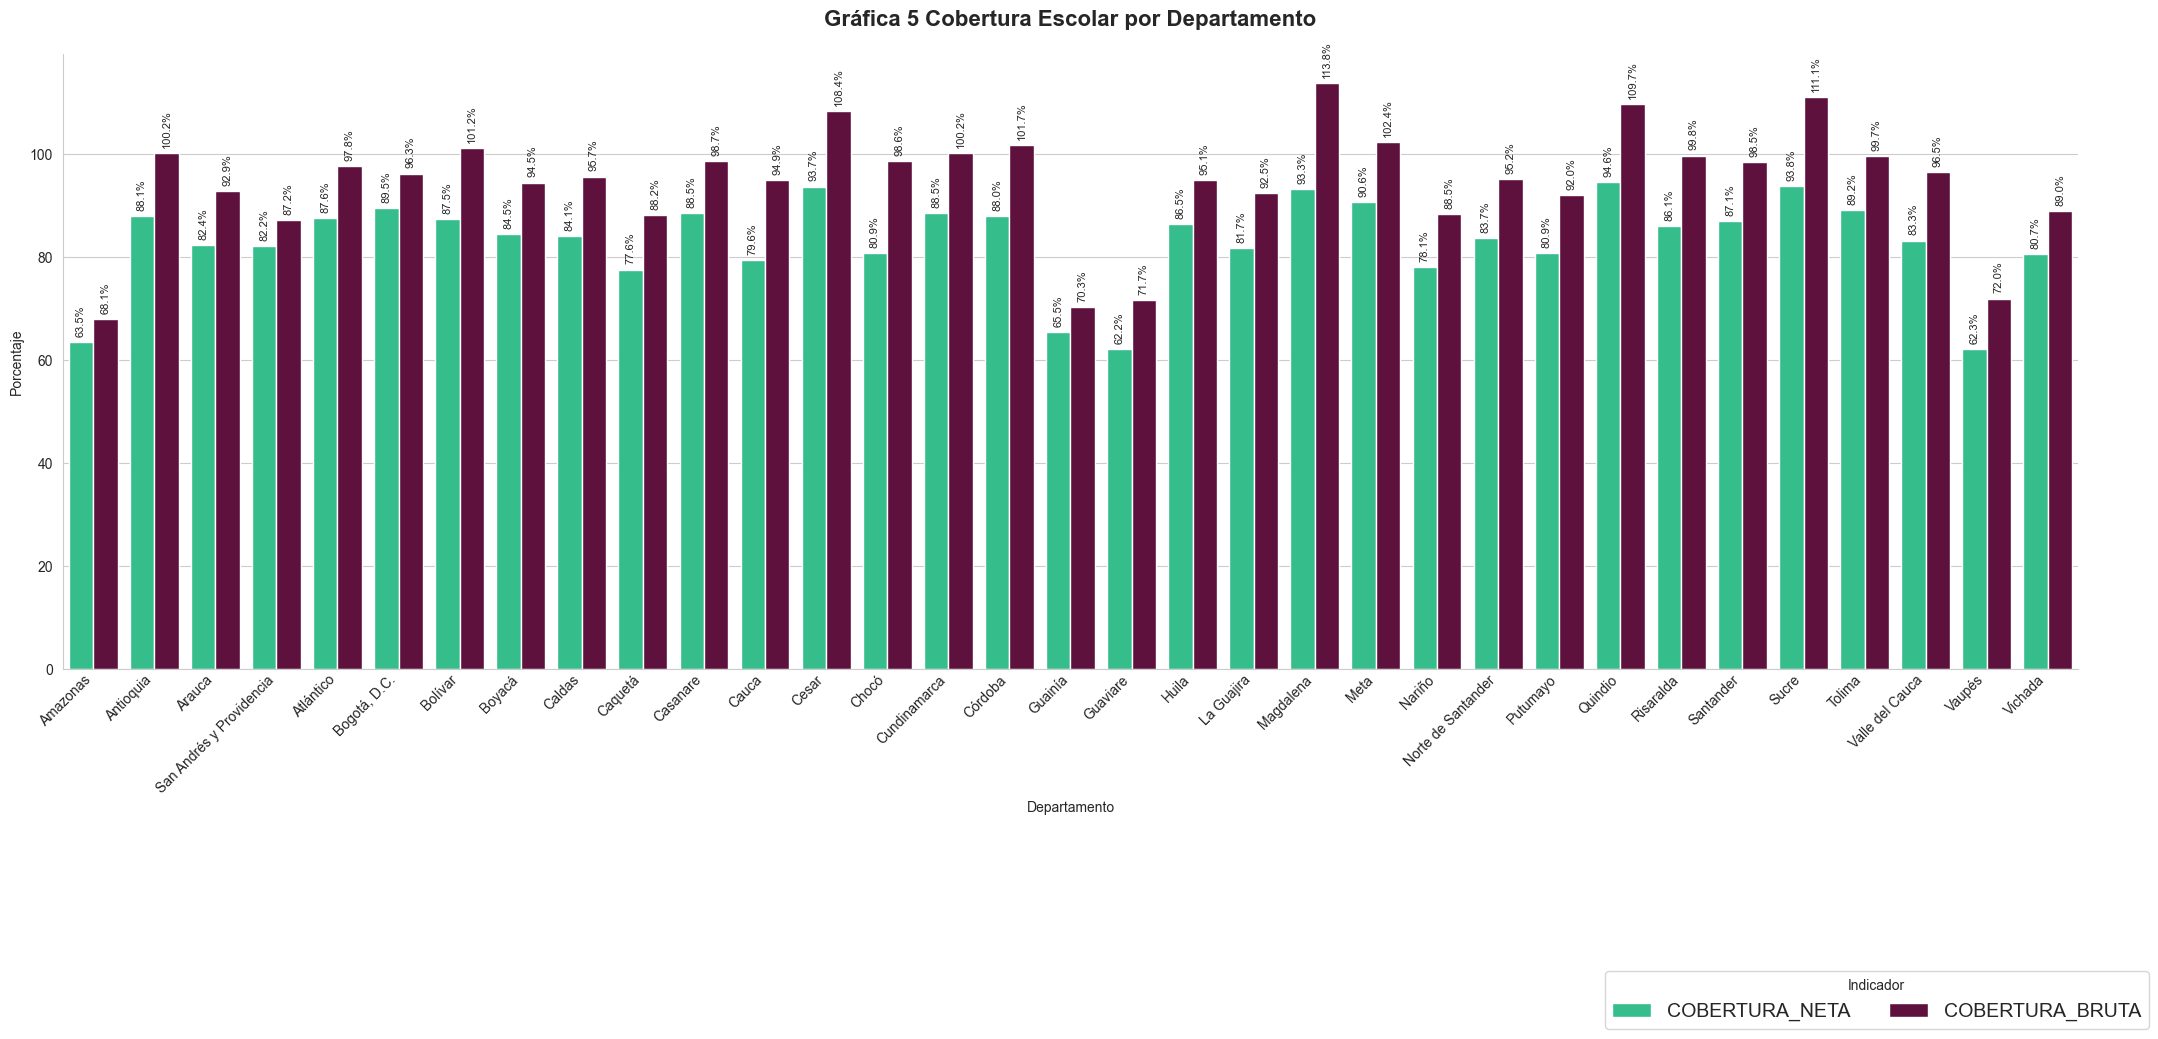

In [807]:
# Filtrar datos por períodos clave
pre_pandemia = data[data['AÑO'].between(2015, 2019)]
pandemia = data[data['AÑO'].isin([2020, 2021])]
post_pandemia = data[data['AÑO'] >= 2022]

# Calcular promedios por departamento y excluir "NACIONAL"
deptos_stats = data.groupby('DEPARTAMENTO')[['COBERTURA_NETA', 'COBERTURA_BRUTA']].mean().reset_index()
deptos_stats = deptos_stats[deptos_stats['DEPARTAMENTO'] != 'NACIONAL']

# Abreviar nombre largo de departamento
deptos_stats['DEPARTAMENTO'] = deptos_stats['DEPARTAMENTO'].replace(
    "Archipiélago de San Andrés, Providencia y Santa Catalina", "San Andrés y Providencia"
)

# Preparar datos para gráfico
df_melted = deptos_stats.melt(id_vars='DEPARTAMENTO', var_name='Indicador', value_name='Valor')

# Estilo
sns.set_style("whitegrid")
plt.figure(figsize=(22, 16))

# Gráfico de barras
ax = sns.barplot(
    data=df_melted,
    x='DEPARTAMENTO',
    y='Valor',
    hue='Indicador',
    palette={'COBERTURA_NETA': "#1FD492", 'COBERTURA_BRUTA': "#6B043F"}
)

# Título y etiquetas
plt.title("Gráfica 5 Cobertura Escolar por Departamento", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Departamento")
plt.ylabel("Porcentaje")

# Ajustes visuales del eje X
plt.xticks(rotation=45, ha='right')

ax.tick_params(axis='x', pad=-1)  

# Leyenda
plt.legend(title="Indicador", fontsize=14, loc='lower center', bbox_to_anchor=(0.9, -0.6), ncol=3)
sns.despine()

# Anotar porcentajes (solo si valor > 1)
for p in ax.patches:
    height = p.get_height()
    if height > 1:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, height + 1),
                    ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

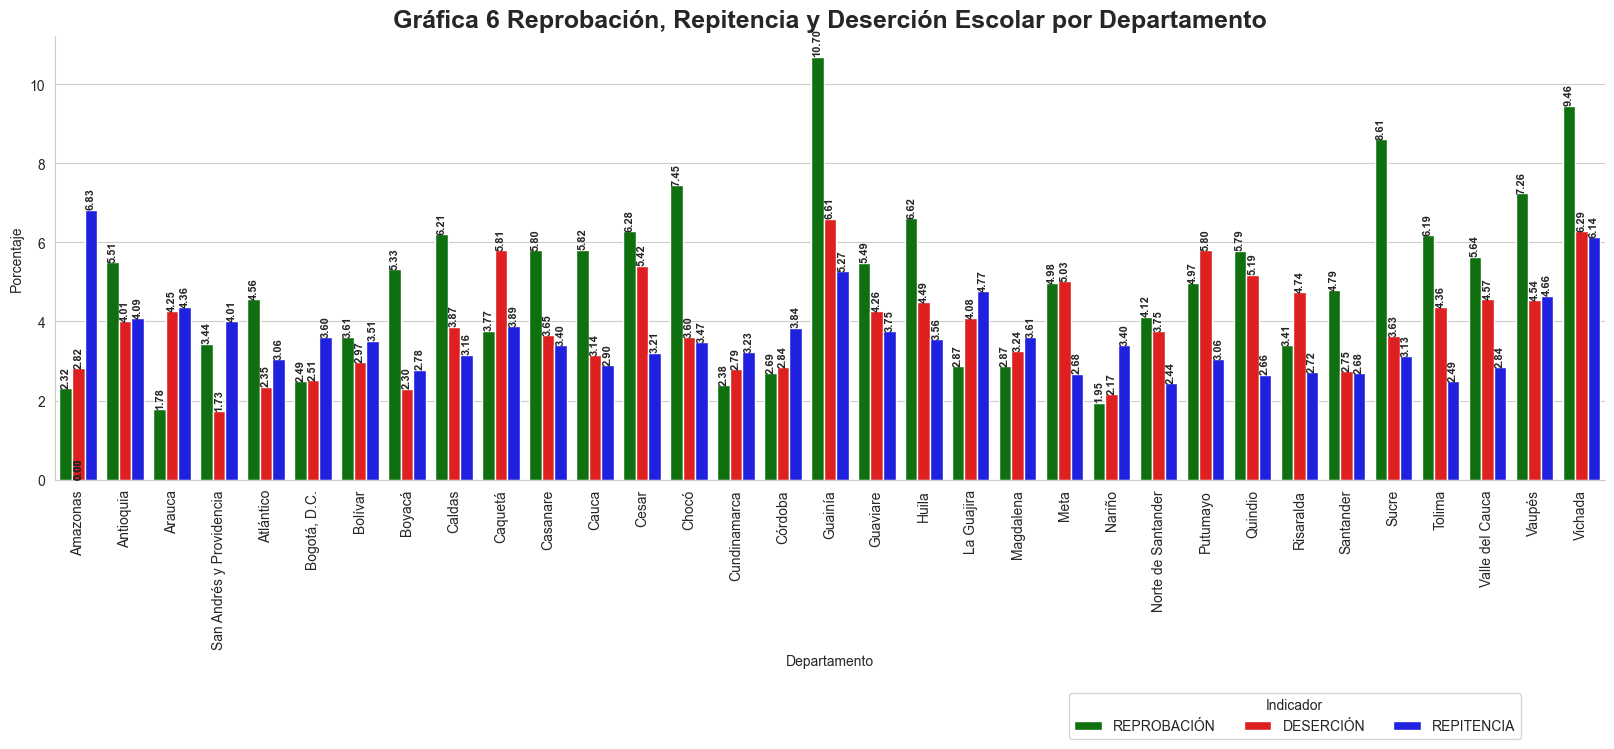

In [808]:
# Filtrar datos por períodos clave
pre_pandemia = data[data['AÑO'].between(2015, 2019)]
pandemia = data[data['AÑO'].isin([2020, 2021])]
post_pandemia = data[data['AÑO'] >= 2022]

# Calcular promedios por departamento y excluir "NACIONAL"
deptos_stats = data.groupby('DEPARTAMENTO')[['REPROBACIÓN', 'DESERCIÓN', 'REPITENCIA']].mean().reset_index()
deptos_stats = deptos_stats[deptos_stats['DEPARTAMENTO'] != 'NACIONAL']  # Excluir "NACIONAL"

# Abreviar el nombre del departamento "Archipiélago de San Andrés, Providencia y Santa Catalina"
deptos_stats['DEPARTAMENTO'] = deptos_stats['DEPARTAMENTO'].replace(
    "Archipiélago de San Andrés, Providencia y Santa Catalina", "San Andrés y Providencia"
)

# Configurar estilo visual
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 6))

# Crear gráfico de barras con colores específicos
sns.barplot(data=deptos_stats.melt(id_vars='DEPARTAMENTO', var_name='Indicador', value_name='Valor'), 
            x='DEPARTAMENTO', y='Valor', hue='Indicador', 
            palette={'REPROBACIÓN': 'green', 'REPITENCIA': 'blue', 'DESERCIÓN': 'red'}, ax=ax)

plt.xticks(rotation=90)
plt.title("Gráfica 6 Reprobación, Repitencia y Deserción Escolar por Departamento", fontsize=18, fontweight='bold')

# Ajustar la posición del título para que quede más arriba
plt.subplots_adjust(top=0.85)

plt.xlabel("Departamento")
plt.ylabel("Porcentaje")

# Agregar etiquetas con valores encima de cada barra (rotadas 90° y más pequeñas)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=8, fontweight='bold', rotation=90)

# Posicionar la leyenda debajo de la etiqueta del eje X
plt.legend(title="Indicador", fontsize=10, loc='lower center', bbox_to_anchor=(0.8, -0.6), ncol=3)
sns.despine()

# Mostrar gráfico
plt.show()


## ¿Cómo se ve la deserción escolar en el pais?

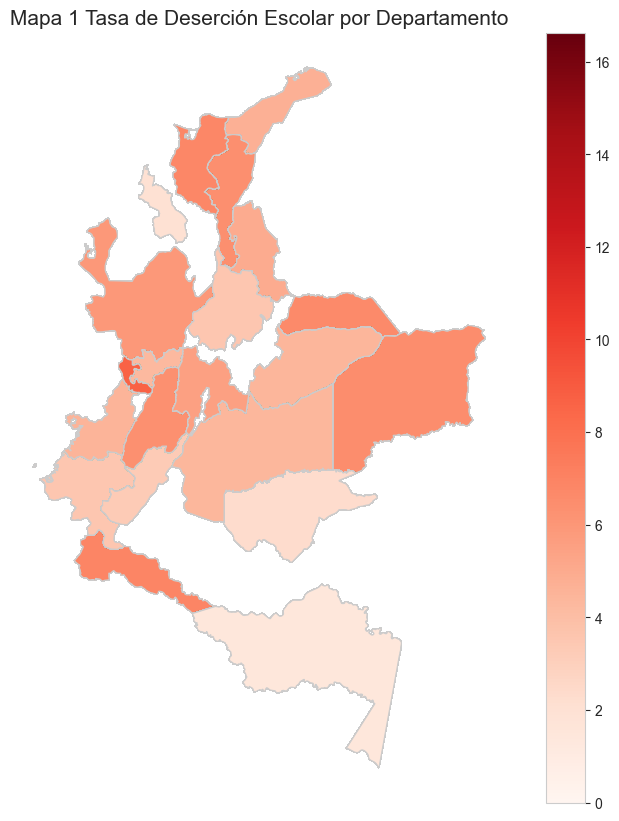

In [809]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el shapefile de departamentos
gdf = gpd.read_file("colombia_departamentos.json")

# Cargar los datos de deserción escolar
df = pd.read_csv("Tasa de deserción - data.csv")

# Unir los datos por nombre del departamento
gdf = gdf.merge(df, left_on="name", right_on="DEPARTAMENTO")

# Graficar
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='DESERCIÃ“N', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Mapa 1 Tasa de Deserción Escolar por Departamento', fontdict={'fontsize': 15})
ax.axis('off')

plt.show()

💡2.3.1 --- Hallazgos claves en la variación de la cobertura y deserción escolar en los departamentos a nivel nacional ----
 
📉 Gráfica 5 Cobertura Escolar por Departamento.

- La perspectiva de los indicadores por departamento, refleja diferencias entre Cobertura Bruta y Neta: La mayoría de los departamentos muestran que la cobertura bruta (indicador en verde) es más alta que la cobertura neta (indicador en azul), lo cual sugiere que, aunque un alto porcentaje de la población en edad escolar está matriculada, parte de esos inscritos no corresponde al grupo de edad apropiado, lo que podría ser un reflejo de estudiantes fuera de rango (ya sea por retrasos o adelantos) en cada grado.

- El indicador de deserción escolar (en rojo) aparece en porcentajes relativamente bajos en la mayoría de los departamentos. Esto es positivo, ya que implica que, aunque no todos los estudiantes se encuentren en el grupo de edad esperado (afectando la cobertura neta), el abandono escolar es limitado.

- Algunos departamentos presentan una diferencia marcada entre la cobertura bruta y la neta, lo que puede señalar problemas específicos en la clasificación de edades o en la administración matricular (por ejemplo, en departamentos con poblaciones dispersas o en zonas rurales).

- Otros departamentos muestran una cobertura bruta muy alta, cercana al 100%, lo que indica un excelente acceso y/o una matrícula casi total de su población en edad escolar.

- En los departamentos donde la cobertura neta es significativamente menor que la bruta pueden deberse a desafíos que están afectando a los estudiantes que caen fuera del rango de edad, lo que podría ser útil para orientar políticas de mejora en la educación y la planificación de recursos.

- Un factor que se consideró desde el inicio del análisis es "En algunos casos la demanda social es mayor a la población en edad teórica para cursar educación preescolar, básica y media (5 a 16 años), explicada por estudiantes en extraedad, por lo que el indicador toma valores superiores al 100%. Esta situación también da lugar al tema del flujo migratorio interno, pero más importante es la revisión que debería hacerse, con el fin de evaluar inversiones a la infraestructura y capacidades que ofrece cada centro educativo que necesiten ampliar la matriculación en general, y por consiguiente que esta revisión incluya censos actualizados para realizar cálculos más acertados en la tasa de cobertura neta.


📉 Gráfica 6 Reprobación, Repitencia y Deserción Escolar por Departamento y Mapa 1 Tasa de Deserción Escolar por Departamento.

- Reprobación (barras verdes): En Departamentos como Vaupés y Vichada se presentan los niveles más altos, superando el 8%. También destacan Caquetá y Putumayo con cifras elevadas.

- Deserción (barras rojas): La tasa de deserción es alta en Vaupés y Vichada, alcanzando cerca del 6%. Otros departamentos como Putumayo y Guaviare también reflejan preocupaciones en este aspecto.

- Repitencia (barras azules): Amazonas y Vaupés tienen los valores más altos, cercanos al 6%. Guainía y Guaviare también presentan niveles considerables de estudiantes que repiten año escolar.

- Correlación entre deserción y repitencia: Los departamentos con altos niveles de repitencia en la gráfica, como Vaupés, Amazonas y Guaviare, también figuran en los índices de deserción escolar, indicando que los estudiantes que repiten un año tienen mayor probabilidad de abandonar el sistema educativo.

- Departamentos con mayor deserción Según el análisis nacional son Guainía y Vichada con 10.21% y 6.99% respectivamente, lo que coincide con los altos niveles de reprobación y repitencia. Esto sugiere que la falta de estabilidad educativa en estos territorios contribuye al abandono escolar.

- Atlántico y su baja deserción muestra una tasa del 2.69%, significativamente más baja que otros departamentos, lo que sugiere mejores condiciones socioeconómicas y estrategias educativas más efectivas.

⚠️ Factores

- El bajo rendimiento escolar y las dificultades económicas suelen destacarse como causas de deserción y la alta repitencia. En zonas con menor acceso tecnológico y alta migración (departamentos fronterizos), la falta de acceso a la educación virtual durante la pandemia profundizó el problema.

- Los conflictos armados, el desplazamiento forzado, la falta de acompañamiento de los padres en el proceso educativo y los problemas familiares son otros factores que pueden contribuir a la deserción.

- La transición a la educación virtual por motivo de la pandemia de COVID-19, la falta de acceso a internet y dispositivos tecnológicos, y los problemas de salud mental en los estudiantes han agravado la situación.

- La falta de interés de los estudiantes por la educación, la indisciplina, los problemas de salud y los embarazos tempranos también influyen en la deserción.

- Los departamentos con altas tasas de reprobación y repitencia suelen experimentar mayores niveles de deserción, lo que confirma la relación entre rendimiento escolar y abandono educativo. Además, el impacto de la pandemia y factores económicos han influido de manera diferenciada, afectando principalmente zonas rurales e indígenas.
